In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [3]:
import cv2
from scipy import io
import os
import datetime

In [4]:
dataset=io.loadmat('Data_hoda_full.mat')

In [6]:
dataset

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jun 30 20:26:30 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Data': array([[array([[  0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,
                   0,   0,   0,   0,   0,   0,   0],
                [  0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
                   0,   0,   0,   0,   0,   0,   0],
                [  0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
                   0,   0,   0,   0, 255, 255,   0],
                [  0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
                   0,   0,   0, 255, 255, 255, 255],
                [  0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
                   0,   0, 255, 255, 255, 255,   0],
                [  0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                   0, 255, 255, 255, 255, 255,   0],
                [255, 255, 255, 255,   0,  

In [7]:
dataset['Data'].shape

(60000, 1)

In [13]:
from sklearn.model_selection import train_test_split
train_data, test_data= train_test_split(dataset['Data'],test_size=0.2,random_state=42)
train_labels, test_labels= train_test_split(dataset['labels'],test_size=0.2,random_state=42)

In [14]:
train_data.shape

(48000, 1)

In [15]:
train_data=np.squeeze(train_data)
test_data=np.squeeze(test_data)
train_labels=np.squeeze(train_labels)
test_labels=np.squeeze(test_labels)

In [18]:
X_train_28by28=[cv2.resize(img, dsize=(28,28)) for img in train_data]
X_test_28by28=[cv2.resize(img, dsize=(28,28)) for img in test_data]

In [39]:
X_train=np.reshape(X_train_28by28,[-1,28,28])
X_test=np.reshape(X_test_28by28,[-1,28,28])
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [40]:
X_train.shape

(48000, 28, 28)

In [41]:
tf.math.reduce_prod([28,28,1])

<tf.Tensor: shape=(), dtype=int32, numpy=784>

In [42]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


shape = X_test.shape[1:]
latent_dim = 64
autoencoder = Autoencoder(latent_dim, shape)

In [43]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [44]:
autoencoder.fit(X_train, X_train,
                epochs=10,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/10
1500/1500 [==============================] - 20s 11ms/step - loss: 0.0396 - val_loss: 0.0207
Epoch 2/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0172 - val_loss: 0.0146
Epoch 3/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0135 - val_loss: 0.0127
Epoch 4/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0120 - val_loss: 0.0115
Epoch 5/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0113 - val_loss: 0.0111
Epoch 6/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0109 - val_loss: 0.0109
Epoch 7/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0107 - val_loss: 0.0109
Epoch 8/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 9/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0104 - val_loss: 0.0107
Epoch 10/10
1500/1500 [==============================] - 17s 11m

In [46]:
encoded_imgs = autoencoder.encoder(X_test).numpy()

In [47]:
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

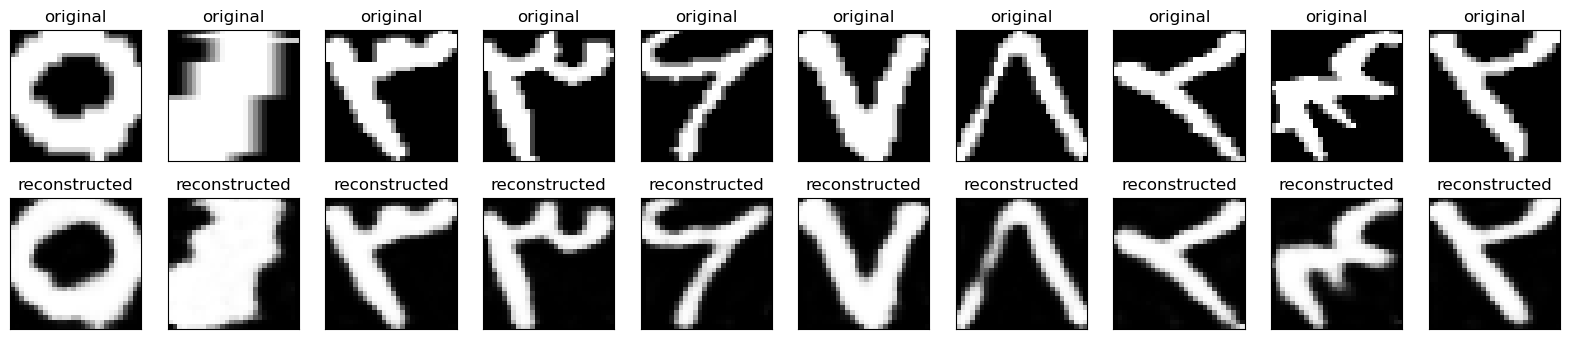

In [48]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()